In [7]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


# Pands Series Data structure

In [6]:
#Create a Pandas Series
ser1 = pd.Series((2,4,5,4,1))
ser1

0    2
1    4
2    5
3    4
4    1
dtype: int64

In [7]:
#Create Series with Dictionary
d = {'a':1, 'b':2, 'c':3}
ser2 = pd.Series(data=d)
ser2

a    1
b    2
c    3
dtype: int64

# Importing Data

File Types are:<ul>
    <li>XLSX use <code>pd.read_excel(...)</code></li>
    <li>CSV - Use <code>pd.read_csv(...)</code></li>
    <li>JSON Use <code>pd.read_jason(...)</code></li>
    <li>HTML Use <code>pd.read_html(...)</code></li>
    <li>SQL use <code>pd.read_sql(...)</code></li>
    <li>HDFS</li>
    <li>SAS</li>
    <li>SPSS</li>
    </ul>

# DataFrame Data Structure

In [4]:
tabs = pd.read_html("https://en.wikipedia.org/wiki/Vienna,_Virginia")
tabs

[                                     Vienna, Virginia  \
 0                                                Town   
 1                              Street scene in Vienna   
 2   .mw-parser-output .ib-settlement-cols{text-ali...   
 3      Location of Vienna in Fairfax County, Virginia   
 4   .mw-parser-output .locmap .od{position:absolut...   
 5   Coordinates: .mw-parser-output .geo-default,.m...   
 6                                             Country   
 7                                               State   
 8                                              County   
 9                                        Incorporated   
 10                                            Settled   
 11                                         Government   
 12                                             • Type   
 13                                            • Mayor   
 14                                     • Town manager   
 15                                            Area[1]   
 16           

In [7]:
import mysql.connector as sql

dbconn = sql.connect(host='localhost', user='root', passwd='skitaos1', database='neural-nfl-data', auth_plugin='mysql_native_password')
ret_df = pd.read_sql('select * from games', dbconn)
ret_df

/Users/stevefurlong/opt/anaconda3/envs/ml-sandbox-venv/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,NaN,NaN,NaN,None,None,None,None
1,NaN,NaN,NaN,None,None,None,None
2,NaN,NaN,NaN,None,None,None,None
3,NaN,NaN,NaN,None,None,None,None
4,NaN,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...
1523,2.021010e+09,2020.0,17.0,01/03/2021,16:25:00,DEN,LV
1524,2.021010e+09,2020.0,17.0,01/03/2021,16:25:00,HOU,TEN
1525,2.021010e+09,2020.0,17.0,01/03/2021,16:25:00,IND,JAX
1526,2.021010e+09,2020.0,17.0,01/03/2021,16:25:00,LA,ARI


# General Pandas Functions

## Melt Function

Converts to/from Wide and Long formats.  Similar to Pivot concept
<br>
Wide Format
<table>
<tr><td>Name</td><td>weight</td><td>BP</td></tr>
<tr><td>john</td><td>150</td><td>120</td></tr>
<tr><td>Jeff</td><td>170</td><td>130</td></tr>
</table>
Long Format
<table>
<tr><td>Name</td><td>key</td><td>Value</td></tr>
<tr><td>john</td><td>weight</td><td>150</td></tr>
<tr><td>john</td><td>BP</td><td>120</td></tr>
<tr><td>Jeff</td><td>weight</td><td>170</td></tr>
<tr><td>Jeff</td><td>BP</td><td>130</td></tr>
</table>


In [16]:
#Switch from Wide format to Long format.
df = pd.DataFrame({'Name':['john','jeff'], 'weight':[150,170],'BP':[120,130]})
print(df)
melt_df = pd.melt(df, id_vars=['Name'], value_vars=['weight','BP'])
melt_df

   Name  weight   BP
0  john     150  120
1  jeff     170  130


,Name,variable,value
0,john,weight,150
1,jeff,weight,170
2,john,BP,120
3,jeff,BP,130


## Pivot Function

In [17]:
#Get back to the Wide Format!
pivot_df = melt_df.pivot(index='Name', columns=['variable'], values='value')
pivot_df

variable,BP,weight
Name,,
jeff,130,170
john,120,150


# Cross Tabulation
Used to Quantitatively analyze variables.  Also analyze the relationship between Categorical columns.<br>
Kinda like a group by function in SQL

In [23]:
import numpy as np
# creating arrays
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)
print(a)
print(b)
print(c)
crosstab_df = pd.crosstab(a, [b,c], rownames=['a'], colnames=['b','c'])
crosstab_df

['foo' 'foo' 'foo' 'foo' 'bar' 'bar' 'bar' 'bar' 'foo' 'foo' 'foo']
['one' 'one' 'one' 'two' 'one' 'one' 'one' 'two' 'two' 'two' 'one']
['dull' 'dull' 'shiny' 'dull' 'dull' 'shiny' 'shiny' 'dull' 'shiny'
 'shiny' 'shiny']


b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

## Binning
Groups data into Bins or Buckets
<br>Also used to convert numerical data to categorical data

In [28]:
import numpy as np

#Binning uses the Cust function
cut_ret1 = pd.cut(np.array([1,7,5,4,6,3]),3)
print(cut_ret1)
cut_ret2 = pd.cut(np.array([1,7,5,4,6,3]),3, labels=['low', 'med', 'high'])
print(cut_ret2)


[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]
['low', 'high', 'med', 'med', 'high', 'low']
Categories (3, object): ['low' < 'med' < 'high']


## Merge & Concat Functions
Must have a common unique key in each table to be merged<br>
Options: Left-Join, Right-Join, Inner-Join, Outer-Join, or Cross-Join

In [31]:
# creating 1st dataframe
df1 = pd.DataFrame({'pincode':[249201,175131,263136,246171,171004], 
                   'city_name':['Rishikesh','Manali','Bhimtal', 'Rudraprayag','Shimla'],
                   'distance_from_delhi':[230,543,321, 370,343]})
# creating 2nd dataframe
df2 = pd.DataFrame({'pincode':[249201,175131,263001],
                   'district':['Dehradun','Kullu','Nainital'],
                   'State':['Uttarakhand','Himachal Pradesh','Uttarakhand']})
#Left Join
merge_df = pd.merge(df1, df2, how='left', on='pincode')
print(merge_df)

#Right Join
merge_df = pd.merge(df1, df2, how='right', on='pincode')
print(merge_df)

   pincode    city_name  distance_from_delhi  district             State
0   249201    Rishikesh                  230  Dehradun       Uttarakhand
1   175131       Manali                  543     Kullu  Himachal Pradesh
2   263136      Bhimtal                  321       NaN               NaN
3   246171  Rudraprayag                  370       NaN               NaN
4   171004       Shimla                  343       NaN               NaN
   pincode  city_name  distance_from_delhi  district             State
0   249201  Rishikesh                230.0  Dehradun       Uttarakhand
1   175131     Manali                543.0     Kullu  Himachal Pradesh
2   263001        NaN                  NaN  Nainital       Uttarakhand


In [32]:
#Now lets try Concat
# dataframes having the same columns
df1 = pd.DataFrame({'Name': ['Arijit', 'Neeraj', 'Sakshi', 'Muskan'],
                    'Age': [34, 30, 22, 33],
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Kartik', 'Veer', 'Preeti'],
                    'Age': [31, 22, 19],
                    'Gender': ['M', 'M', 'F']}
                  )
df = pd.concat([df1, df2], axis = 0)
df

,Name,Age,Gender
0,Arijit,34,M
1,Neeraj,30,M
2,Sakshi,22,F
3,Muskan,33,M
0,Kartik,31,M
1,Veer,22,M
2,Preeti,19,F


## Handling Missing Values
Types of Missing Values
<ul>
    <li>MCAR - Missing Completely At Random - no pattern</li>
    <li>MAR - Missing At Random - some association with other features</li>
    <li>MNAR - Missing Not At Random</li>
</ul>

In [58]:
dict1 = {'col1':[2019,2019,2020],'col2':[350,365,1],'col3':[None,365,None]}
df = pd.DataFrame(dict1)
print(df, "\n")

#Find count of NaN values 
print(df.isnull().sum(),"\n")

#Also can use "any" function
print(df.isnull().any())

#Fill missing values with mean
print(df.fillna(df.mean()))

   col1  col2   col3
0  2019   350    NaN
1  2019   365  365.0
2  2020     1    NaN 

col1    0
col2    0
col3    2
dtype: int64 

col1    False
col2    False
col3     True
dtype: bool
   col1  col2   col3
0  2019   350  365.0
1  2019   365  365.0
2  2020     1  365.0


## Data Type Conversion
For example string to numeric

In [51]:
dict1 = {'col1':[1,2],'col2':[3,4]}
df = pd.DataFrame(data=dict1)
print(df, "\n")

print(df.dtypes, "\n")
df = df.astype('int32')
print(df.dtypes, "\n")

df['col1'] = df['col1'].astype(str)
print(df.dtypes, "\n")


   col1  col2
0     1     3
1     2     4 

col1    int64
col2    int64
dtype: object 

col1    int32
col2    int32
dtype: object 

col1    object
col2     int32
dtype: object 



## Evaluate complex Equasions in PD with "eval" function

In [58]:
df = pd.DataFrame([[2,3],[5,1],[4,5]],columns=['A','B'])
print(df, "\n")

eq = '(A + 3) / B'
print (df.eval(eq), "\n")

   A  B
0  2  3
1  5  1
2  4  5 

0    1.666667
1    8.000000
2    1.400000
dtype: float64 



# Pandas Series
Series are a one dimensional array

parameters(data = "array, iterable, dict, or scalar", index =  )


## Series have Attributes


|``Attributes``|	|``Description``|
|--------------|----|---------------|
|Series.index|	|Defines the index of the Series.|
|Series.shape|	|It returns a tuple of shape of the data.|
|Series.dtype|	|It returns the data type of the data.|
|Series.size|	|It returns the size of the data.|
|Series.empty|	|It returns True if Series object is empty, otherwise returns false.|
|Series.hasnans|	|It returns True if there are any NaN values, otherwise returns false.|
|Series.nbytes|	|It returns the number of bytes in the data.|
|Series.ndim|	|It returns the number of dimensions in the data.|

In [62]:
ps = pd.Series(['Ganga', 'yamuna', 'Gomiti', 'Koshi', 'Godavari','Kaveri'])
print(ps, "\n")

print(ps.index, "\n")
print(ps.shape, "\n")
print(ps.dtype, "\n")
print(ps.size, "\n")
print(ps.empty, "\n")
print(ps.hasnans, "\n")
print(ps.nbytes, "\n")
print(ps.ndim, "\n")

0       Ganga
1      yamuna
2      Gomiti
3       Koshi
4    Godavari
5      Kaveri
dtype: object 

RangeIndex(start=0, stop=6, step=1) 

(6,) 

object 

6 

False 

False 

48 

1 



## Indexing and Iteration in Pandas Series

python index start at 0

Can use ranges using "loc[]" and "iloc[]"



In [82]:

ps = pd.Series(['Ganga', 'yamuna', 'Gomiti', 'Koshi', 'Godavari','Kaveri'], index = ['a','b','c','d','e','f'])
print(ps, "\n")

#Location Based Indexing
print(ps['b'])
print("Index [b] \n", ps.loc['b'],"\n")
print("Index [a:d] \n", ps.loc['a':'d'],"\n")
print("Index ['a':'f':2] \n", ps.loc['a':'f':2],"\n") #Stride it by 2

# Integer Location Based Indexing
print(ps['b'])
print("Index [0] \n", ps.iloc[0],"\n")
print("Index [2:] \n", ps.iloc[2:],"\n")
print("Index [:2] \n", ps.iloc[:2],"\n")
print("Index [:] \n", ps.iloc[:],"\n")
print("Index [::2] \n", ps.iloc[::2],"\n") #Stride it by 2


a       Ganga
b      yamuna
c      Gomiti
d       Koshi
e    Godavari
f      Kaveri
dtype: object 

yamuna
Index [b] 
 yamuna 

Index [a:d] 
 a     Ganga
b    yamuna
c    Gomiti
d     Koshi
dtype: object 

Index ['a':'f':2] 
 a       Ganga
c      Gomiti
e    Godavari
dtype: object 

yamuna
Index [0] 
 Ganga 

Index [2:] 
 c      Gomiti
d       Koshi
e    Godavari
f      Kaveri
dtype: object 

Index [:2] 
 a     Ganga
b    yamuna
dtype: object 

Index [:] 
 a       Ganga
b      yamuna
c      Gomiti
d       Koshi
e    Godavari
f      Kaveri
dtype: object 

Index [::2] 
 a       Ganga
c      Gomiti
e    Godavari
dtype: object 



In [83]:
# iterating over all the elements
for i in ps.iteritems():
    print(i)

('a', 'Ganga')
('b', 'yamuna')
('c', 'Gomiti')
('d', 'Koshi')
('e', 'Godavari')
('f', 'Kaveri')


## Binary Operations on Pandas Series

In [86]:
# creating two pandas series
s1 = pd.Series([2,4,6,1,6,0])
s2 = pd.Series([5,1,7,4,2,3])

#Addition
print (s1 + s2)
print (s1.add(s2))

#Subtraction
print (s1 - s2)
print (s1.sub(s2))

#Muliplication & Division is also available

0     7
1     5
2    13
3     5
4     8
5     3
dtype: int64
0     7
1     5
2    13
3     5
4     8
5     3
dtype: int64
0   -3
1    3
2   -1
3   -3
4    4
5   -3
dtype: int64
0   -3
1    3
2   -1
3   -3
4    4
5   -3
dtype: int64


## Groupby Function in Pandas
A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.


In [92]:
# creating a series
ser = pd.Series([390., 350., 30., 20.],
        index=['Falcon', 'Falcon', 'Parrot', 'Parrot'], name="Max Speed")
print(ser, "\n")

ser.groupby(['a', 'a','b','b']).mean()


Falcon    390.0
Falcon    350.0
Parrot     30.0
Parrot     20.0
Name: Max Speed, dtype: float64 



a    370.0
b     25.0
Name: Max Speed, dtype: float64

## Window Function
Expanding and Rollinw Windows

In [96]:
# creating a series
s = pd.Series([2,4,7,3,1,8,4,2,5])
print (s, "\n")

#Sums the two preceeding values.
print(s.rolling(window=2).sum(), "\n")

s.expanding(min_periods = 2).sum()

0    2
1    4
2    7
3    3
4    1
5    8
6    4
7    2
8    5
dtype: int64 

0     NaN
1     6.0
2    11.0
3    10.0
4     4.0
5     9.0
6    12.0
7     6.0
8     7.0
dtype: float64 



0     NaN
1     6.0
2    13.0
3    16.0
4    17.0
5    25.0
6    29.0
7    31.0
8    36.0
dtype: float64

## Description Statistics in Pandas Series


In [61]:
#describing numerical series
s = pd.Series([1, 2, 3])
print(s.describe(), "\n")

#describing categorical series
s = pd.Series(['a', 'a', 'b', 'c'])
print(s.describe(), "\n")


count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64 

count     4
unique    3
top       a
freq      2
dtype: object 



## Reindexing in Series

Rows and columns both have indexes

Row indicies - index

column indicies - are column names


In [5]:
# creating a pandas series
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
ser = pd.Series([200, 200, 404, 404, 301],
                  index=index)
print(ser, "\n")

# changing the index of the series
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
             'Chrome']
ser.reindex(new_index)

Firefox      200
Chrome       200
Safari       404
IE10         404
Konqueror    301
dtype: int64 



Safari           404.0
Iceweasel          NaN
Comodo Dragon      NaN
IE10             404.0
Chrome           200.0
dtype: float64

## Reshaping Series
Chaning number of rows and columns

In [9]:
# create a series
ser = pd.Series([2, 4, 6, 8, 10, 12])
print(ser, "\n")

print(ser.shape, "\n")

reshaped_ser = s.values.reshape((3,2))
print(reshaped_ser.shape, "\n")
print(reshaped_ser, "\n")


0     2
1     4
2     6
3     8
4    10
5    12
dtype: int64 

(6,) 

(3, 2) 

[[ 2  4]
 [ 6  8]
 [10 12]] 



## Sorting a Series

In [15]:
# creating a series
s = pd.Series([2, 1, 3, 10, 5])
print(s, "\n")
print(s.sort_values(), "\n")
print(s.sort_values(ascending= False), "\n")

0     2
1     1
2     3
3    10
4     5
dtype: int64 

1     1
0     2
2     3
4     5
3    10
dtype: int64 

3    10
4     5
2     3
0     2
1     1
dtype: int64 



## Date Time Properties in Series

In [18]:
# Creating the Series
sr = pd.Series(['2012-10-21 09:30', '2019-7-18 12:30', '2008-02-2 10:30',
               '2010-4-22 09:25', '2019-11-8 02:22'])
print(sr, "\n")
# Convert the underlying data to datetime 
s = pd.to_datetime(sr)
print(s, "\n")

#Get Date Properties
print(s.dt.date, "\n")
print(s.dt.year, "\n")
print(s.dt.quarter, "\n")
s.b

0    2012-10-21 09:30
1     2019-7-18 12:30
2     2008-02-2 10:30
3     2010-4-22 09:25
4     2019-11-8 02:22
dtype: object 

0   2012-10-21 09:30:00
1   2019-07-18 12:30:00
2   2008-02-02 10:30:00
3   2010-04-22 09:25:00
4   2019-11-08 02:22:00
dtype: datetime64[ns] 

0    2012-10-21
1    2019-07-18
2    2008-02-02
3    2010-04-22
4    2019-11-08
dtype: object 

0    2012
1    2019
2    2008
3    2010
4    2019
dtype: int64 

0    4
1    3
2    1
3    2
4    4
dtype: int64 



# Data Frames
DataFrame is a 2-dimensional labelled data structure.


Sort, melt, merge, windowing all work the same as Series

## DataFrame Attributes


In [29]:
# creating a data frame
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
print(df, "\n")

#create with no keys
data = pd.DataFrame([[2,3,4],[4,3,0]])
print(data, "\n")

#Show the range of the keys
print(df.index, "\n")

#Show the column names
print(df.columns, "\n")

#Show the data types of column
print(df.dtypes, "\n")

#Show the axes of each column
print(df.axes, "\n")

#Show the shape of the DF
print(df.shape, "\n")

#Show the size. total elements in the df
print(df.size, "\n")

#Show if the DF is empty of not
print(df.empty, "\n")


   col1  col2
0     1     3
1     2     4 

   0  1  2
0  2  3  4
1  4  3  0 

RangeIndex(start=0, stop=2, step=1) 

Index(['col1', 'col2'], dtype='object') 

col1    int64
col2    int64
dtype: object 

[RangeIndex(start=0, stop=2, step=1), Index(['col1', 'col2'], dtype='object')] 

(2, 2) 

4 

False 



## Indexing & Iteration in DataFrames

In [43]:
# creating data frame, use range of dates as index
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
print(df, "\n")

#All rows and one column
print(df.loc[:, 'A'], "\n")

#All rows and range of columns
print(df.loc[:, 'A':'B'], "\n")

#With Row Striding
print(df.loc[::2, 'A':'B'], "\n")

#Indexing using df.iterrows
for index, row in df.iterrows():
    print("Index: {} Rows: {}".format(index, row.values))
    
    
#index using df.itertubles
for tuple in df.itertuples():
    print(tuple)

                   A         B         C         D
2000-01-01  0.347041  0.757265  1.390214 -0.982885
2000-01-02 -0.407911 -0.911989  0.309114 -0.206342
2000-01-03  0.314936  0.087566  0.158962  0.591812
2000-01-04 -0.774071 -1.559302  0.898762 -1.171796
2000-01-05  2.375722  0.597298  1.178727 -2.087694
2000-01-06  0.164261 -1.164341  1.539545  0.333813
2000-01-07  0.046753 -0.334500  0.074974 -0.463802
2000-01-08 -0.421999 -1.076555  1.593660  0.251712 

2000-01-01    0.347041
2000-01-02   -0.407911
2000-01-03    0.314936
2000-01-04   -0.774071
2000-01-05    2.375722
2000-01-06    0.164261
2000-01-07    0.046753
2000-01-08   -0.421999
Freq: D, Name: A, dtype: float64 

                   A         B
2000-01-01  0.347041  0.757265
2000-01-02 -0.407911 -0.911989
2000-01-03  0.314936  0.087566
2000-01-04 -0.774071 -1.559302
2000-01-05  2.375722  0.597298
2000-01-06  0.164261 -1.164341
2000-01-07  0.046753 -0.334500
2000-01-08 -0.421999 -1.076555 

                   A         B
2000-01-

## Binary operations on DataFrames

In [49]:
# defining data frames
df1 = pd.DataFrame([[2,3,5],[1,4,2],[2,7,5]])
df2 = pd.DataFrame([[3,2,5],[4,8,4],[1,6,7]])

#All simple operations work
print (df1 + df2, "\n")

#Matrix Dot product
print (df1.dot(df2), "\n")

#Matrix Power function product element wise
print (df1.pow(df2), "\n")

#Compares elements of first df are < elements of second df
# others are eq(), neq(), le(), gt(), ge()
print (df1.lt(df2), "\n")

   0   1   2
0  5   5  10
1  5  12   6
2  3  13  12 

    0   1   2
0  23  58  57
1  21  46  35
2  39  90  73 

   0       1      2
0  8       9   3125
1  1   65536     16
2  2  117649  78125 

       0      1      2
0   True  False  False
1   True   True   True
2  False  False   True 



## GroupBy and Window Functions in DataFrames

In [54]:
data = pd.read_csv('datasets/employee.csv')
print(data.head(), "\n")

# grouping the data by department
print(data.groupby(['Department']).agg({'Age':'mean','DailyRate':'max'}), "\n")

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

## Descriptive Statistics in DataFrames

In [56]:
data = pd.read_csv('datasets/employee.csv')
print(data.head(), "\n")

# describing numerical values
print(data.describe(), "\n")

# describing categoricle values
print(data.describe(include='object'), "\n")

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [60]:
## Transpose Matrix opteration for Data Frames
df.transpose()

#Also df.T transforms as well
df.T

,0,1,2
col1,2019.0,2019.0,2020.0
col2,350.0,365.0,1.0
col3,NaN,365.0,NaN


## Timeseries Data
Timeseries is an ordered sequence of data periods spread out over a time horizon

In [64]:
#creating Time Series data
time_series = pd.date_range('4/1/2021',periods = 20)
df = pd.DataFrame({'date':time_series})

print(df, "\n")

print(df.dtypes, "\n")

df['year'] = df['date'].dt.year
print(df['year'], "\n")

         date
0  2021-04-01
1  2021-04-02
2  2021-04-03
3  2021-04-04
4  2021-04-05
5  2021-04-06
6  2021-04-07
7  2021-04-08
8  2021-04-09
9  2021-04-10
10 2021-04-11
11 2021-04-12
12 2021-04-13
13 2021-04-14
14 2021-04-15
15 2021-04-16
16 2021-04-17
17 2021-04-18
18 2021-04-19
19 2021-04-20 

date    datetime64[ns]
dtype: object 

0     2021
1     2021
2     2021
3     2021
4     2021
5     2021
6     2021
7     2021
8     2021
9     2021
10    2021
11    2021
12    2021
13    2021
14    2021
15    2021
16    2021
17    2021
18    2021
19    2021
Name: year, dtype: int64 



## Ploting with DataFrames
Pandas has a buildin function called plot().

In [65]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose', 'Rose','Shanky'],
    'age':[23,78,22,19,45,33,20, 23,33],
    'gender':['M','F','M','M','M','F','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas','california','california'],
    'num_children':[2,0,0,3,2,1,4,2,0],
    'num_pets':[5,1,0,5,2,2,3,1,2]
})
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3
7,Rose,23,F,california,2,1
8,Shanky,33,M,california,0,2


<AxesSubplot:>

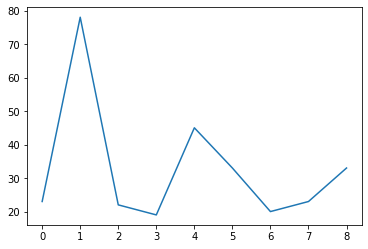

In [66]:
df['age'].plot()

<AxesSubplot:>

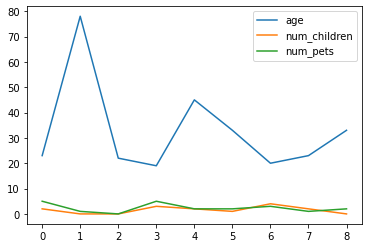

In [70]:
df.plot()

<AxesSubplot:>

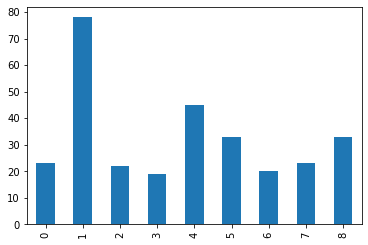

In [71]:
df['age'].plot(kind='bar')

<AxesSubplot:xlabel='name'>

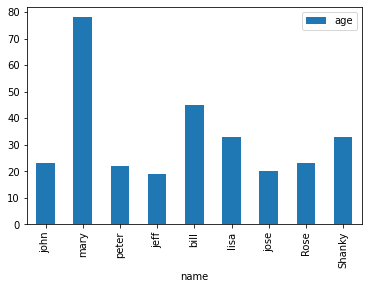

In [72]:
df.plot(x = 'name', y = 'age', kind = 'bar')

<AxesSubplot:xlabel='num_children', ylabel='num_pets'>

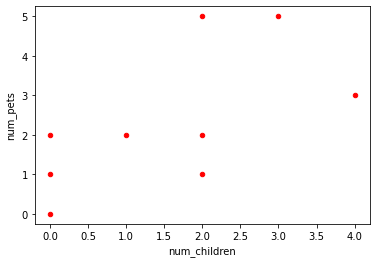

In [73]:
df.plot(x = 'num_children', y = 'num_pets', color = 'red', kind = 'scatter')

## Serializing DataFrames
### Copying Pandas DataFrame Object Contents To Clipboard
* A clipboard in an operating system is a portion of physical memory that provides short-term storage to be used between programs.
* The clipboard in an operating system enables cut-copy-paste operations between programs and within a program as well.
* The contents of a pandas DataFrame object can be stored in clipboard through the method to_clipboard().

In [74]:
textMatrix = [("Earth", "Sphere", "Geoid"),

              ("Matter", "Particle", "Wave"),

              ("Magnet", "Flex", "Electricity")]


# Create a DataFrame

df = pd.DataFrame(data=textMatrix)

# Copy DataFrame contents to clipboard

df.to_clipboard(sep="\t")

In [75]:
df

,0,1,2
0,Earth,Sphere,Geoid
1,Matter,Particle,Wave
2,Magnet,Flex,Electricity


In [78]:
#Export a DF to HTML
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Earth</td>\n      <td>Sphere</td>\n      <td>Geoid</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Matter</td>\n      <td>Particle</td>\n      <td>Wave</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Magnet</td>\n      <td>Flex</td>\n      <td>Electricity</td>\n    </tr>\n  </tbody>\n</table>'

In [79]:
df.to_dict()

{0: {0: 'Earth', 1: 'Matter', 2: 'Magnet'},
 1: {0: 'Sphere', 1: 'Particle', 2: 'Flex'},
 2: {0: 'Geoid', 1: 'Wave', 2: 'Electricity'}}

TypeError: NDFrame.to_sql() missing 2 required positional arguments: 'name' and 'con'

# Pandas Arrays

In [3]:
arr = pd.array(['a', 'b', 'c'])
arr

<StringArray>
['a', 'b', 'c']
Length: 3, dtype: string

## Date Time Data

In [5]:
arr = pd.Timestamp('2020-9-12', tz='Europe/Berlin')

print(arr, "\n")

arr_timestamp = arr_timestamp.tz_licalize('

Timestamp('2020-09-12 00:00:00+0200', tz='Europe/Berlin')

## Handling Time Delta

In [10]:
pd.Timedelta('2 days')

print(pd.Timedelta(3, unit='h'), "\n")

print(pd.Timedelta('-4 days'), "\n")

0 days 03:00:00 

-4 days +00:00:00 



## Handling Categorical data

In [12]:
a = pd.Categorical(['a', 'b', 'c', 'a'])
a

['a', 'b', 'c', 'a']
Categories (3, object): ['a', 'b', 'c']

## Handling Time Interval Data

In [15]:
# creating intervals
iv = pd.Interval(left = 0, right = 5)
iv

#Is 0 in the interval?
print(0 in iv, "\n")

False 



In [16]:
year_2017 = pd.Interval(pd.Timestamp('2017-01-01 00:00:00'),
                        pd.Timestamp('2018-01-01 00:00:00'),
                        closed='left')
year_2017

Interval('2017-01-01', '2018-01-01', closed='left')

## Handling Time Span Data

In [19]:
p = pd.Period('2020-9-4')
p

Period('2020-09-04', 'D')

In [20]:
p+1

Period('2020-09-05', 'D')

In [22]:
p1 = pd.Period('2020-9-4', freq='M')
p1

Period('2020-09', 'M')

In [23]:
p1+1

Period('2020-10', 'M')